# Force Field Optimization

## Project Overview
Molecular dynamics (MD) is a computer simulation technique for studying structure and dynamics of complex systems with extreme detail--literally on scales where the motion of individual atoms can be tracked. MD acts as a bridge between experiment and theory to develop a realistic model to describe experimental measurements. We can test a model by conducting a simulation and comparing the simulation result with experimental measurements. At the same time, the hidden detail behind the experiment can be revealed. The main strength of MD method is the ability to determine the time evolution of a system at atomic-level resolution which brings new insights into mechanisms and processes that are not directly accessible through experiment. In addition, we are able to carry out simulations that are too difficult or impossible to be treated with standard experimental tools. Providing information at atomic-level resolution, MD has subsequently become an invaluable tool to facilitate and complement experimental studies in different research fields such as chemistry, biochemistry, and material science. 

Molecular Dynamics simulation is in many respects very similar to real experiments. First, we need to prepare a sample of material that we want to study. A sample consists of initial positions and velocities of atoms in the system. By using the proper interaction potential, the classical equation of motion is solved numerically for all atoms in the system step-by-step. The simulation will be continued until the properties of the system no longer change with time, the so-called equilibrium state.  After equilibration, the physical quantities are measured based on the positions and velocities of all atoms in the system. For example, the temperature of the system is a function of velocities of all atoms.

Molecular dynamics uses Newton’s equations of motion to computationally simulate the time evolution of a set of interacting atoms. Such techniques are dependent on a description of how molecules will interact. In classical MD simulations, atoms are treated as classical objects, resembling soft ball. The interaction between soft balls is defined by the Lennard-Jones (LJ) potential as follows:

\begin{equation*}
V_{LJ} = 4\epsilon [\left( \frac{\sigma}{r}\right)^{12} - \left( \frac{\sigma}{r}\right)^{6}]
\end{equation*}

where $\sigma$ is the radius of the soft balls, $\epsilon$ is the strength of the interaction, and $r$ is the distance between the atoms. Using LJ potential leads to tremendous computational simplification. In chemistry and physics a description of the terms by which the particles interact is usually referred to as a force field, and the procedure to determine LJ parameters ($\sigma$  and $\epsilon$) to reproduce experimental data is referred to as force field optimization. 

Optimizing a realistic LJ potential that would adequately mimic the real materials is nontrivial. The underlying physics of interaction of two atoms is too complex to describe with only two parameters which determine the length and energy scales. The potential is thus unique, and cannot reproduce all properties of real materials.  Due to the complexity of the problem, an empirical approach is mostly used to optimize force field. In this technique, the optimization procedure is based on the reproduction of experimental measurements by simulating a small system. Via an iterative approach, the LJ parameters are primarily optimized to reproduce experimental data. This strategy is significantly demanding since MD simulation is very expensive and simulation results are very sensitive to the LJ parameters; slightly change the LJ parameters has a significant influence on the simulation results.  Due to the difficulty of empirical force field calculations and the complexity of defining realistic potential, it is difficult or impossible to reproduce more than two experimental data.

The empirical approach for a system with dissimilar atoms is more demanding than a system with similar atoms since the number of LJ parameters increase by increasing the type of atoms in the system. For example, in a system consists of two types of atoms A and B, three different interactions occur: two similar interactions between atoms of the same type A-A and B-B and a dissimilar interaction between atoms of different types A-B. Therefore, it is necessary to define 3 LJ potentials, leading to optimize six parameters. For simplicity, one can use the combination rules to define the LJ parameters for dissimilar interaction as follow:

\begin{equation*}
ϵ_{AB}=√(ϵ_A ϵ_B) \quad σ_{AB}=(σ_A + σ_B)/2
\end{equation*}

Using the combination rules reduce the number of LJ parameters need to determine. However, it can affect the outcome of the simulation, and it is necessary to optimize force field for materials with the similar type of atoms. 

## Problem Statement

Calcium phosphate has many engineering and biomedical application, and we would like to use the MD simulation to detect the formation of calcium phosphate nanoparticles at atomic-level resolution. Calcium phosphate is made of two separate parts, calcium and phosphate. Phosphate is a kind of salt that consists of one central phosphorus atom surrounded by four oxygen atoms.  Force field of pure phosphorus and oxygen atoms were developed and validated against experimental data. However, in order to simulate a phosphate we need to optimize existing force field to reproduce experimental measurements. 

Phosphate has two types of atoms, and we need to optimize 4 LJ parameters; two LJ parameters for phosphorus and two LJ parameters for oxygen. As a first guess, we used the force field developed for pure phosphorus and oxygen atoms. Then we employed a grid search method to define a set of LJ parameters. For each set of LJ parameters, one MD simulation has been performed and physical properties of the system have been measured. The data set provides a large collection of LJ parameters and simulation results corresponding to each set of LJ parameters.

The main aim of this project is to employ machine learning algorithms to find a relationship between LJ parameters and simulation results, leading to the development of force field to reproduce experimental measurements. It is a supervised learning problem, more specifically a regression problem. The LJ parameters that we want to predict are called the dependent variables or target variables. In contrast to most of the supervised learning problem, here we have more than one target variable. The MD simulation results that we will use to predict the target variables are called independent variables or regressor variables.  We also would like to study the influence of the number of training sample in the accuracy of our prediction. As mentioned before, MD simulation is very expensive, and developing a model to predict the LJ parameters with a limited number of training sample can significantly reduce the computational time.

Here, we will employ several algorithms for training, and we will evaluate the performance of each algorithm by calculating an appropriate score. To optimize the parameters of each algorithm, we will use grid search and cross-validation techniques. Finally, the optimized method will be used to predict the LJ parameters based on the experimental measurements. Using the prediction LJ parameters, we will perform MD simulation and calculate the accuracy of MD simulation by comparing simulation results and experimental measurements. 

## Metrics
To evaluate the performance of the prediction algorithms R squared, R2, is calculated. R2 describes the proportion of the variance in the target variable that is predictable from the independent variable. The best possible score is 1.0, and a model with the highest score has the best performance. The R2 score is also used to study the performance of models as a function of number of training sample. 

In the final step, we use the realistic data obtained from experimental measurement as a set of independent variable to predict target variables, and the predicted target variables are used for an MD simulation. To evaluate the accuracy of MD simulation against experiment data, we measure the accuracy as follows:

\begin{equation*}
error = \frac{experiment - MD~simulation}{experiment} * 100
\end{equation*}

## Analysis

In [2]:
import numpy as np
import pandas as pd
import os
from time import time
# Pretty display for notebooks
%matplotlib inline

In [37]:
os.chdir("/home/amin/Desktop/DataIncubator")
dir = os.getcwd()
print "Path at terminal when executing this file:\n{}".format(dir)

# Read data
data = pd.read_csv("FF.csv")
print "Data read successfully!"
print data.shape
data.describe()

Path at terminal when executing this file:
/home/amin/Desktop/DataIncubator
Data read successfully!
(4355, 15)


,JobNumber,sigP,epsiP,sigO,epsiO,a,b,c,alpha,beta,gamma,density,Cleav,Interface,Solvation
count,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.0,4355.0,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000
mean,2178.888634,4.300092,0.250007,3.500046,0.119989,28.657301,28.657461,29.239715,90.0,90.0,119.999809,2.909440,1347.586270,-227.372736,-706.517259
std,1257.495998,0.316242,0.034161,0.316286,0.034156,0.839512,0.839317,1.372049,0.0,0.0,0.005926,0.305426,234.986886,138.934645,39.046300
min,1.000000,3.800000,0.200000,3.000000,0.070000,26.467610,26.445006,26.525660,90.0,90.0,119.909643,2.357965,0.000000,-588.414643,-801.979098
25%,1090.500000,4.000000,0.220000,3.200000,0.090000,28.026157,28.027768,28.119604,90.0,90.0,119.997615,2.655548,1184.905565,-327.332929,-738.351655
50%,2179.000000,4.300000,0.260000,3.500000,0.110000,28.658189,28.656921,29.190841,90.0,90.0,119.999925,2.892776,1374.300229,-211.415497,-704.165108
75%,3267.500000,4.600000,0.280000,3.800000,0.150000,29.334599,29.333604,30.396617,90.0,90.0,120.002195,3.144468,1554.018691,-113.859415,-672.847395
max,4356.000000,4.800000,0.300000,4.000000,0.170000,30.469037,30.464088,31.864694,90.0,90.0,120.049333,3.724957,1679.146074,16.102536,-630.241372


The dataset is organized in the format of csv file and consists of 4355 rows and 14 columns, of which four columns contains LJ parameters, and ten columns are the result of the MD simulation. The dataset is completely clean, and there are no missing values. The statistical analysis of the data is given in the above table.

Two features alpha and beta are constant, indicating no relationship between these features and target variables. According to the basic statistical analysis, the features have different scaling, and it has a beneficial effect if we normalize and center the data (with mean 0 and variance 1). Especially, for Ridge and Lasso model where the penalty term might depend on the scaling of features.

In [9]:
#Preparaing the data
feature_cols = list(data.columns[5:15]) # variables
feature_cols.remove('alpha') # remove alpha since it is constant
feature_cols.remove('beta')
target_cols = list(data.columns[1:5]) # target variables

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget columns: {}".format(target_cols)

X_all = data[feature_cols]
y_all = data[target_cols]

Feature columns:
['a', 'b', 'c', 'gamma', 'density', 'Cleav', 'Interface', 'Solvation']

Target columns: ['sigP', 'epsiP', 'sigO', 'epsiO']


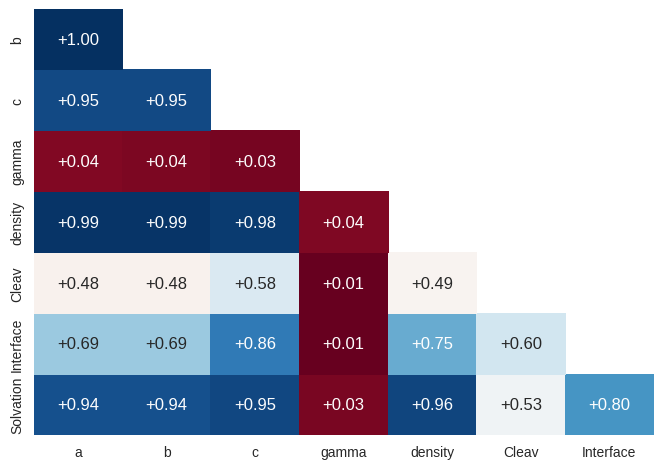

In [10]:
# get the feature correlations
corr = X_all.corr()

# remove first row and last column for a cleaner look
corr.drop(['a'], axis=0, inplace=True)
corr.drop(['Solvation'], axis=1, inplace=True)

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns
with sns.axes_style("white"):
    sns.heatmap(abs(corr), mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

To explore the dataset, we calculate the correlation matrix for all regressor variables. Noted that the two features alpha and beta are dropped from dataset since their values are constant. The correlation matrix shows that the three variables a, b, and c are highly correlated to the density, which is expected since the density directly correlated to the volume of the MD simulation box and the volume is calculated by multiplying the three variables. The linear correlation between the three variables and density is obvious in scatter matrix plot (Fig below). There is no correlation between gamma variable and other variables. It seems the value of gamma variable has small fluctuations around the mean value with standard deviation of 0.005926. The diagonal of the scatter plot represents the distribution density of the variables. According to these observations, we only have four variables that can help us to develop our prediction model.

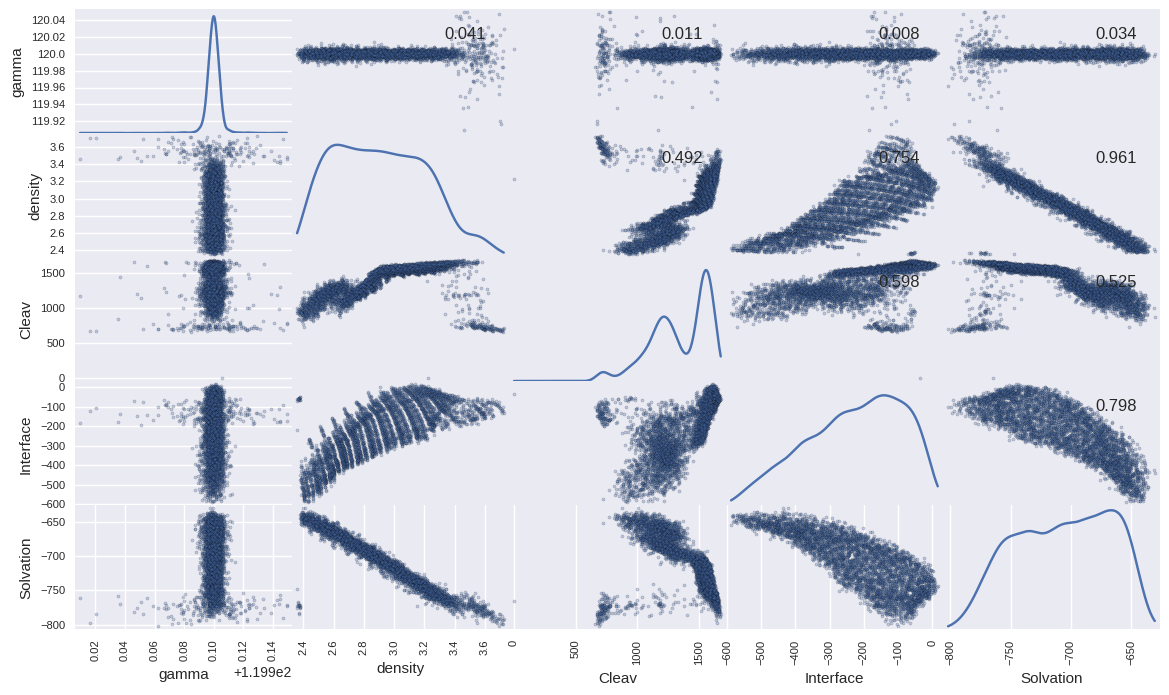

In [11]:
# density is highly correlated to the unit cell size and we can remove them from features
feature_cols.remove('a')
feature_cols.remove('b')
feature_cols.remove('c')

X_all = data[feature_cols]

axes = pd.scatter_matrix(X_all, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = X_all.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %abs(corr[i,j]), (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In this project, we have four target variables; changing a regressor variable has an influence on all target variables.  Therefore, it is difficult to visualize the relationship between regressor variables and target variables. Here, we try to simplify the problem by calculating the average of a regressor variable over two target variables to reduce the number of target variables from 4 to 2 variables. We use contour plot to show the relationship between one regressor variable and two target variables. For example, we calculate the average of density for a given set of sigP and epsiP, showing in the figure below up-left. Using all combination of target variables, we demonstrate how density depends on the target variables. Density is anticorrelated with sigP and sigO; reducing these two variables increases the density. It seems there is no correlation between density and epsiP.

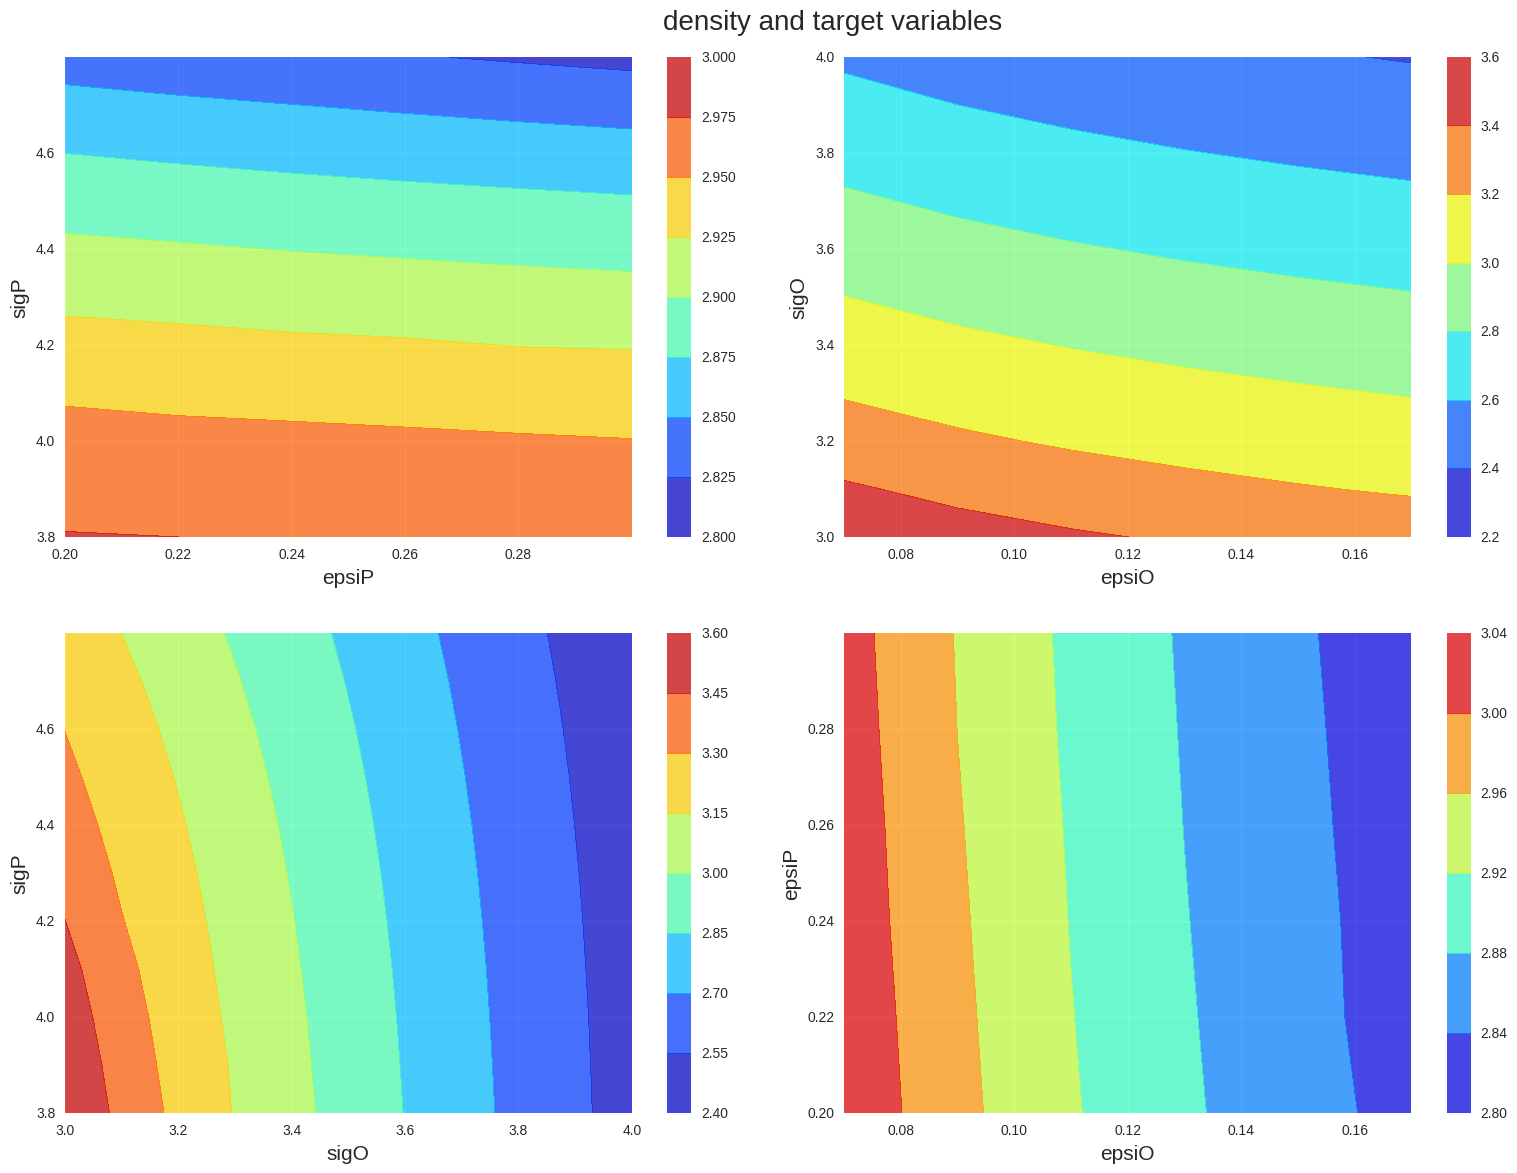

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.1)
fig.suptitle('density and target variables', fontsize=20)

# Make first subplot
dt = data[['sigP', 'epsiP', 'density']]
dt = dt.pivot_table(index='sigP', columns='epsiP', values='density')

X=dt.columns.values
Y=dt.index.values
Z=dt.values
x,y=np.meshgrid(X, Y)

cp1 = axs[0, 0].contourf(x, y, Z, alpha=0.7, cmap=plt.cm.jet)
axs[0, 0].set_xlabel('epsiP', fontsize=15)
axs[0, 0].set_ylabel('sigP', fontsize=15)
fig.colorbar(cp1, ax=axs[0,0])

# Make second subplot
dt = data[['sigO', 'epsiO', 'density']]
dt = dt.pivot_table(index='sigO', columns='epsiO', values='density')

X=dt.columns.values
Y=dt.index.values
Z=dt.values
x,y=np.meshgrid(X, Y)

cp1 = axs[0, 1].contourf(x, y, Z, alpha=0.7, cmap=plt.cm.jet)
axs[0, 1].set_xlabel('epsiO', fontsize=15)
axs[0, 1].set_ylabel('sigO', fontsize=15)
fig.colorbar(cp1, ax=axs[0,1])

# Make 3th subplot
dt = data[['sigP', 'sigO', 'density']]
dt = dt.pivot_table(index='sigP', columns='sigO', values='density')

X=dt.columns.values
Y=dt.index.values
Z=dt.values
x,y=np.meshgrid(X, Y)

cp1 = axs[1, 0].contourf(x, y, Z, alpha=0.7, cmap=plt.cm.jet)
axs[1, 0].set_xlabel('sigO', fontsize=15)
axs[1, 0].set_ylabel('sigP', fontsize=15)
fig.colorbar(cp1, ax=axs[1,0])

# Make 3th subplot
dt = data[['epsiP', 'epsiO', 'density']]
dt = dt.pivot_table(index='epsiP', columns='epsiO', values='density')

X=dt.columns.values
Y=dt.index.values
Z=dt.values
x,y=np.meshgrid(X, Y)

cp1 = axs[1, 1].contourf(x, y, Z, alpha=0.7, cmap=plt.cm.jet)
axs[1, 1].set_xlabel('epsiO', fontsize=15)
axs[1, 1].set_ylabel('epsiP', fontsize=15)
fig.colorbar(cp1, ax=axs[1,1])

plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #ignore the warning to keep ipython clean

## Algorithms and Techniques
Force field optimization is a regression supervised learning problem, and there are few algorithms available for training a regressor to learn from data. Two algorithms with different complexity are selected based on the nature of problem and training data. For each algorithm, a set of parameters is optimized by using grid search and cross validation technique. 

**Linear Regression:** Linear regression is an approach for modeling the linear relationship between the target variables and regressor variables. It fits a linear model to minimize the residual sum of squares between the target variables in the dataset, and the predicted value by the linear approximation. The linear model is highly biased, and it can only explain the linear relationship between the target variables and regressor variables. The model is extended to describe non-linear relationship by using a polynomial kernel. Employing polynomial function increase the flexibility of the prediction model, leading to the overfitting of the predicted values. To control the flexibility of the model more accurately, we use the techniques that regularize the coefficient estimates such as Ridge, Lasso, and ElasticNet. These techniques impose a penalty on the size of predicted model’s coefficients.

**Gradient Boosting Regressor (GBR):**In general boosting methods combine weak learners into a single strong learner, in an iterative fashion. Here we restrict our discussion of boosting to the context of decision trees. GBR tries to minimize the mean squared error by growing multiple decision trees. Unlike fitting a single large decision tree to the data, which amounts to fitting the data hard and potentially overfitting, the boosting approach instead learns slowly. At each stage, GBR fits a tree to the residuals from the model as the response and, then, adds this new decision tree into the fitted function to update the residuals. By fitting small trees to the residuals, GBR slowly improves the model in areas where it does not perform well. 


## Data Preprocessing and Impementation
The dataset is the result of the MD simulations, and it is well organized. Therefore, no preprocessing work is required to clean the data or fill in missing values. We only drop the unnecessary features discussed in the analysis section from the dataset. Then, the dataset is normalized since the scale of values differs amongst the features. After this step, each column has zero mean and unit variance. 

To implement the learning algorithm to predict the target variables, in the first step, we split the dataset into a training set and a testing set using the function train_test_split from the package sklearn.cross_validation. 90% of the data is used for training the model, while 10% is reserved for testing the model once it has been trained. This split is chosen due to the small number of data in the dataset. Note that this split happens after the preprocessing of dataset explained before.

Once the dataset is split into training and testing sets, the regression model can be built and trained. It is necessary to optimize the parameters of the model to enhance the performance of the prediction models and obtain the best performance. We employ the grid search technique from the sklearn.grid_search package to optimize the parameters. Several parameters are incorporated into the GridSearchCV function. The grid search is performed using K-fold cross-validation (k = 5) with each possible permutation of the input parameters to obtain the best set of input parameters. The input parameters were described for each algorithm before. 

The linear regression model has the flexibility to fit nonlinear data by constructing non-linear kernel. Here, we use the make_pipline function from package sklearn.pipline to feed a non-linear kernel to linear regression and build a single object representing a simple non-linear regression. The PolynomialFeature function is used as a non-linear kernel from Sklearn.preprocessing package, and we built a polynomial regression. This technique can also be applied to the Ridge and Lasso model. The flexibility of polynomial function defined by the degree of polynomial function is optimized by using grid search technique. 

In contrast to the linear regression model, the GBR model doesn’t support multiple outputs. Therefore, the GBR is required to extend to support multi-target regression. The MultiOutRegressor is used along with GBR to train a dataset with multiple outputs. This strategy consists of fitting one regressor per target. 

In [16]:
# Preprocessing
from sklearn import preprocessing
X_scale = preprocessing.scale(X_all)
y_scale = preprocessing.scale(y_all)

#split the data
from sklearn.cross_validation import train_test_split
num_test = int(X_all.shape[0] * 0.1)
#X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=123)

In [17]:
# Linear regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

# evaluate the linear model
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Model has four coefficients of determination, R^2, of {}.".format(score)

score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "The average of four coefficients of determination, R^2, of {}.".format(score_t)

#record the score for linear regression
result = {'linear': np.append(score, score_t)}

Model has four coefficients of determination, R^2, of [ 0.77794445 -0.00640432  0.95516734  0.19469225].
The average of four coefficients of determination, R^2, of 0.480349929165.


In [19]:
# Ridge model
from sklearn.linear_model import Ridge
reg = Ridge()

# Gridsearch 
from sklearn import grid_search
from sklearn.metrics import make_scorer

parameters = {'alpha' : map(lambda x: x/10.0, range(0,10))}

r2_scorer = make_scorer(r2_score, multioutput='uniform_average')

grid = grid_search.GridSearchCV(estimator=reg, param_grid=parameters, scoring=r2_scorer, cv=5)
grid_obj = grid.fit(X_train, y_train)

grid_best = grid_obj.best_estimator_
print grid_best

grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Full set of scores {}.".format(score)
score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "Model has a coefficient of determination, R^2, of {}.".format(score_t)

#record the score for linear regression
result.update({'ridge': np.append(score, score_t)})

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Full set of scores [ 0.77873754 -0.00667601  0.95507397  0.19533835].
Model has a coefficient of determination, R^2, of 0.480618461666.


In [20]:
# Lasso model
from sklearn.linear_model import Lasso
reg = Lasso()

parameters = {'alpha' : map(lambda x: x/10.0, range(1,10))}

r2_scorer = make_scorer(r2_score, multioutput='uniform_average')

grid = grid_search.GridSearchCV(estimator=reg, param_grid=parameters, scoring=r2_scorer, cv=5)
grid_obj = grid.fit(X_train, y_train)

grid_best = grid_obj.best_estimator_
print grid_best

grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Full set of scores {}.".format(score)
score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "Model has a coefficient of determination, R^2, of {}.".format(score_t)

#record the score for linear regression
result.update({'lasso': np.append(score, score_t)})

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Full set of scores [ 0.74273107 -0.00450623  0.92662166  0.03184606].
Model has a coefficient of determination, R^2, of 0.424173139933.


In [21]:
# polynomial + linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
reg = make_pipeline(PolynomialFeatures(), linear_model.LinearRegression())

parameters = {'polynomialfeatures__degree' : [1, 2, 3], 
              'polynomialfeatures__interaction_only' :[True, False]}

          
r2_scorer = make_scorer(r2_score, multioutput='variance_weighted')

grid = grid_search.GridSearchCV(estimator=reg, param_grid=parameters, scoring=r2_scorer, cv=5)
grid_obj = grid.fit(X_train, y_train)

grid_best = grid_obj.best_estimator_
print grid_best

grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Full set of scores {}.".format(score)
score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "Model has a coefficient of determination, R^2, of {}.".format(score_t)

#record the score for linear regression
result.update({'pol_linear': np.append(score, score_t)})

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
Full set of scores [ 0.84222558 -1.36138881  0.55301407 -6.82817401].
Model has a coefficient of determination, R^2, of -1.69858079525.


In [22]:
# polynomial + Ridge
reg = make_pipeline(PolynomialFeatures(), Ridge())

parameters = {'ridge__alpha' : map(lambda x: x/10.0, range(1,10)),
              'polynomialfeatures__degree' : [1, 2, 3], 
              'polynomialfeatures__interaction_only' :[True, False]}

r2_scorer = make_scorer(r2_score, multioutput='uniform_average')

grid = grid_search.GridSearchCV(estimator=reg, param_grid=parameters, scoring=r2_scorer, cv=5)
grid_obj = grid.fit(X_train, y_train)

grid_best = grid_obj.best_estimator_
print grid_best

grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Full set of scores {}.".format(score)
score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "Model has a coefficient of determination, R^2, of {}.".format(score_t)   

#record the score for linear regression
result.update({'pol_ridge': np.append(score, score_t)})

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])
Full set of scores [ 0.84153799 -1.30593692  0.5826421  -5.74361847].
Model has a coefficient of determination, R^2, of -1.40634382479.


In [24]:
# polynomial + Lasso
reg = make_pipeline(PolynomialFeatures(), Lasso(max_iter=2000))

parameters = {'lasso__alpha' : map(lambda x: x/10.0, range(1,10)),
              'polynomialfeatures__degree' : [1, 2, 3], 
              'polynomialfeatures__interaction_only' :[True, False]}

r2_scorer = make_scorer(r2_score, multioutput='uniform_average')

grid = grid_search.GridSearchCV(estimator=reg, param_grid=parameters, scoring=r2_scorer, cv=5)
grid_obj = grid.fit(X_train, y_train)

grid_best = grid_obj.best_estimator_
print grid_best

grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Full set of scores {}.".format(score)
score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "Model has a coefficient of determination, R^2, of {}.".format(score_t)  
        
#record the score for linear regression
result.update({'pol_lasso': np.append(score, score_t)})

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=2000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])
Full set of scores [ 0.91923872 -0.00616761  0.96282629  0.30229749].
Model has a coefficient of determination, R^2, of 0.544548723273.


In [25]:
# MultiTaskElasticNet
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import grid_search
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

model = make_pipeline(PolynomialFeatures(), linear_model.ElasticNet(max_iter=2000))
parameters = {'elasticnet__alpha' : map(lambda x: x/10.0, range(1,10)), 
              'elasticnet__l1_ratio' : map(lambda x: x/10.0, range(1,10)),
              'polynomialfeatures__degree' : [1, 2, 3], 
              'polynomialfeatures__interaction_only' :[True, False]}


r2_scorer = make_scorer(r2_score, multioutput='uniform_average')
grid = grid_search.GridSearchCV(estimator=model, param_grid=parameters, scoring=r2_scorer, cv=5)
grid_obj = grid.fit(X_train, y_train)

grid_best = grid_obj.best_estimator_
print grid_best

grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Full set of scores {}.".format(score)
score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "Model has a coefficient of determination, R^2, of {}.".format(score_t)  
        
#record the score for linear regression
result.update({'pol_elastic': np.append(score, score_t)})

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=2000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])
Full set of scores [  9.18333576e-01   3.67719187e-05   9.66240297e-01   3.04800651e-01].
Model has a coefficient of determination, R^2, of 0.547352823956.


In [27]:
# GBoosting
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
model = MultiOutputRegressor(GradientBoostingRegressor())

parameters = {'estimator__max_depth' : [2, 3, 4, 5, 6, 7], 'estimator__learning_rate' : [0.1, 0.2, 0.3], 
              'estimator__n_estimators' :[100, 200, 300], 'estimator__max_features':[1, 2, 3, 4]}
r2_scorer = make_scorer(r2_score, multioutput='uniform_average')
grid = grid_search.GridSearchCV(estimator=model, param_grid=parameters, scoring=r2_scorer, cv=5)
grid_obj = grid.fit(X_train, y_train)

grid_best = grid_obj.best_estimator_
print grid_best

grid_best.fit(X_train, y_train)
y_pred = grid_best.predict(X_test)
score = r2_score(y_test,y_pred, multioutput='raw_values')
print "Full set of scores {}.".format(score)
score_t = r2_score(y_test,y_pred, multioutput='uniform_average')
print "Model has a coefficient of determination, R^2, of {}.".format(score_t)

result.update({'GBR': np.append(score, score_t)})

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=4,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
           n_jobs=1)
Full set of scores [ 0.94379841 -0.00100776  0.98126541  0.59507015].
Model has a coefficient of determination, R^2, of 0.629781551397.


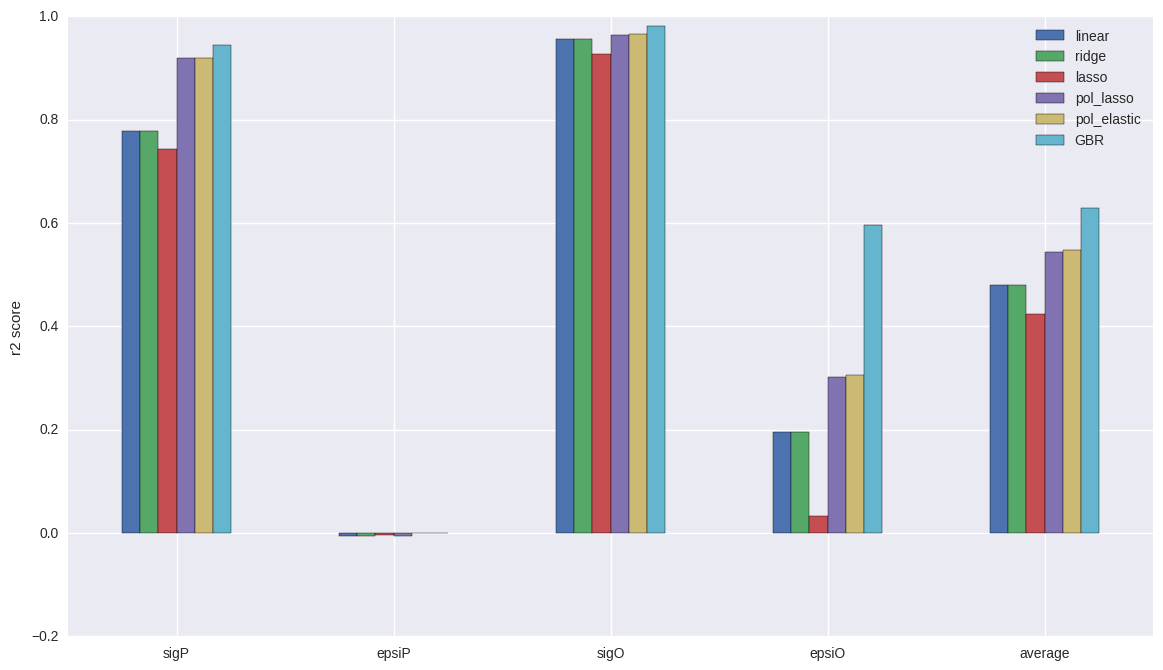

In [28]:
pd_result = pd.DataFrame(result)
pd_result = pd_result.drop('pol_linear', axis=1)
pd_result = pd_result.drop('pol_ridge', axis=1)

pd_result = pd_result[['linear', 'ridge', 'lasso', 'pol_lasso', 'pol_elastic', 'GBR']]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,8))
pd_result.plot.bar(ax = ax)
ax.set_ylabel("r2 score")
label = ['sigP', 'epsiP', 'sigO', 'epsiO', 'average']
ax.set_xticklabels(label, rotation=0)

## Model Evaluation and Validation
To evaluate the performance of all prediction model after parameters optimization, we calculate the score for all target values as well as a uniform average of them. According to our calculations, the linear model, used as the benchmark, provides a reasonable result for SigP and SigO but it can’t predict the epsiP and epsiO. Using ridge and lasso models, we cannot improve the performance of the prediction model, showing that the linear model doesn’t suffer the overfitting problem. The polynomial function is used as a kernel for linear regression, ridge, and lasso, to study more complex models with non-linear behavior. Similar to the linear models, these non-linear models can’t predict epsiP, and we obtain a high negative score for epsiP with polynomial regression and polynomial ridge models, leading to a small score for uniform average. Noted that, we didn’t include these two models in figure for clarity. However, the polynomial lasso increases the score by 13%. The polynomial Elastinet which combines the two ridge and lasso models slightly improves the performance. We obtain the best performance by using GBR model, indicate that there is a complex and nonlinear relationship between the target variables and regressor variables. 

Two best models, polynomial Elastinet and GBR models, are selected for further evaluation and study. The sensitivity of the two prediction models to the subset of the data used for training is measured and plotted below. As expected for Elasticnet, the both training and testing scores converge to the target value very fast, indicating that the model does not depend on the number of training sample and using more data doesn’t improve the performance.  In contrast to the Elasticnet, the performance of the GBR strongly depends on the number of training data, and using more data might improve the performance of the model. Overall the performance of the GBR is better than the Elasticnet even for the small number of data. In addition, the standard deviation from the mean value for the GBR model is much smaller than the elasticnet, indicating that using different sample doesn’t have a significant influence on the prediction result.

/home/amin/Software/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1734: UserWarning: Coordinate descent with l1_reg=0 may lead to unexpected results and is discouraged.
  check_random_state(self.random_state), random)
/home/amin/Software/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1739: UserWarning: Objective did not converge, you might want to increase the number of iterations
  warnings.warn('Objective did not converge, you might want'


(400, 3919.5)

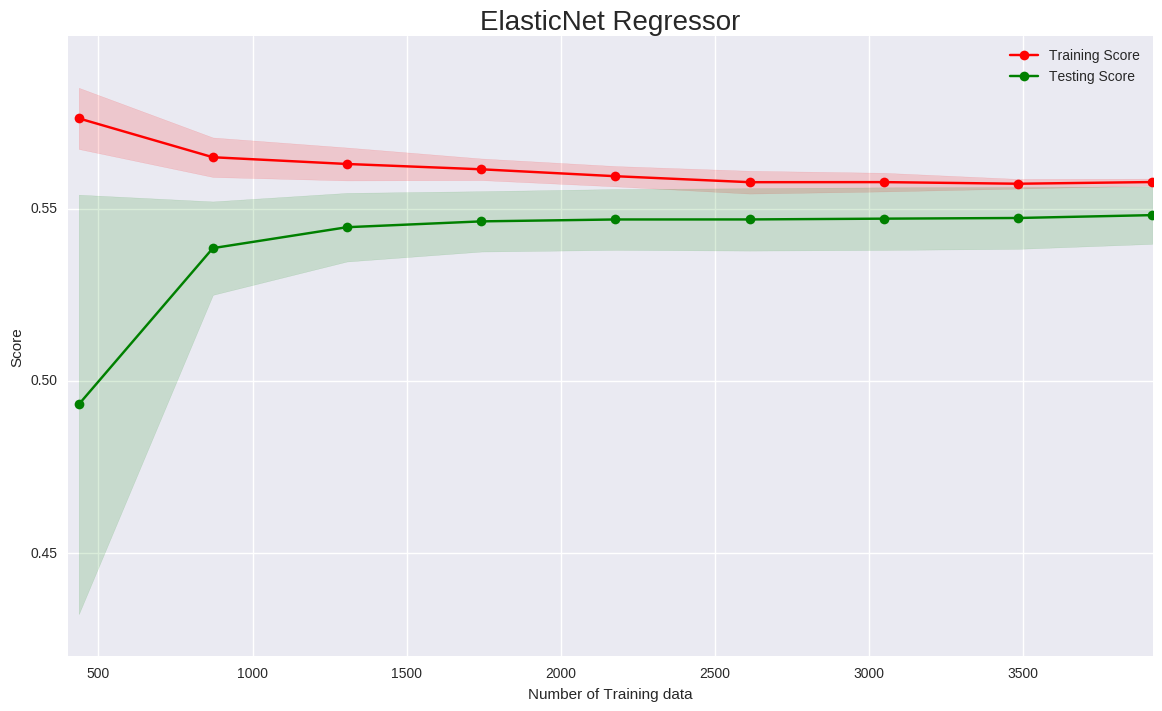

In [30]:
# Create 10 cross-validation sets for training and testing
from sklearn.cross_validation import ShuffleSplit, train_test_split
cv = ShuffleSplit(X_scale.shape[0], n_iter = 10, test_size = 0.1, random_state = 123)

# Generate the training set sizes 
train_sizes = np.rint(np.linspace(X_scale.shape[0]*0.1, X_scale.shape[0]*0.9-1, 9)).astype(int)

# MultiTaskElasticNet
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

regressor = make_pipeline(PolynomialFeatures(degree=3, include_bias=True, interaction_only=False) \
                          , linear_model.MultiTaskElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
          max_iter=2000, normalize=False, random_state=None,
          selection='cyclic', tol=0.0001, warm_start=False))

# Calculate the training and testing scores
import sklearn.learning_curve as curves
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
r2_scorer = make_scorer(r2_score, multioutput='uniform_average')
sizes, train_scores, test_scores = curves.learning_curve(regressor, X_all, y_scale, \
            cv = cv, train_sizes = train_sizes, scoring = r2_scorer)

# Find the mean and standard deviation for smoothing
train_std = np.std(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,8))

ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
ax.fill_between(sizes, train_mean - train_std, \
                train_mean + train_std, alpha = 0.15, color = 'r')
ax.fill_between(sizes, test_mean - test_std, \
                test_mean + test_std, alpha = 0.15, color = 'g')
ax.legend()      
# Labels
ax.set_title('ElasticNet Regressor', fontsize=20)
ax.set_xlabel('Number of Training data')
ax.set_ylabel('Score')
ax.set_xlim([400, X_all.shape[0]*0.9])

(400, 3919.5)

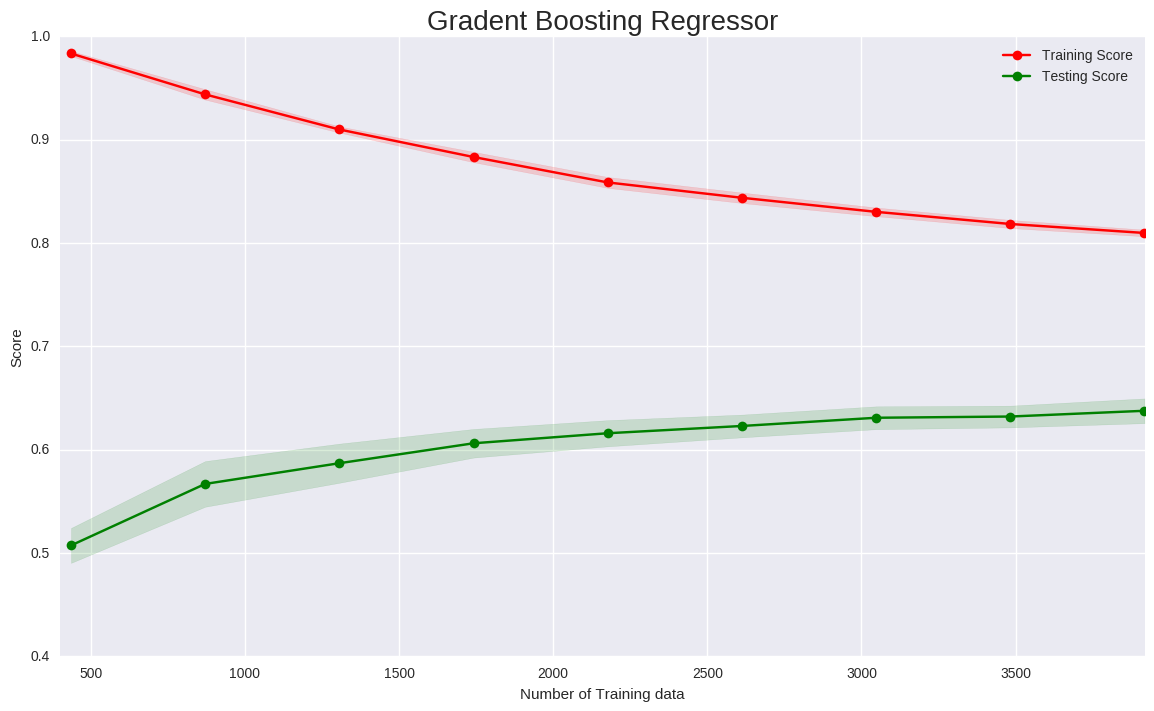

In [31]:
# GBR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=4,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))

sizes, train_scores, test_scores = curves.learning_curve(regressor, X_all, y_scale, \
            cv = cv, train_sizes = train_sizes, scoring = r2_scorer)

# Find the mean and standard deviation for smoothing
train_std = np.std(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,8))

ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
ax.fill_between(sizes, train_mean - train_std, \
                train_mean + train_std, alpha = 0.15, color = 'r')
ax.fill_between(sizes, test_mean - test_std, \
                test_mean + test_std, alpha = 0.15, color = 'g')
ax.legend()      
# Labels
ax.set_title('Gradent Boosting Regressor', fontsize=20)
ax.set_xlabel('Number of Training data')
ax.set_ylabel('Score')
ax.set_xlim([400, X_all.shape[0]*0.9])

## Conclusion
The goal of this project was to optimize the MD parameters to reproduce the experimental by using the machine learning algorithms. In order to justify whether developed models can predict the MD parameters, we used the experimental measurements as test data and predicted target values by using the trained prediction models. The MD parameters predicted by the models are used as an MD parameters, and we perform MD simulations. The accuracy of each simulation is calculated based on the function defined in the metric section. Noted that, the best possible score for accuracy is 0, and a model with the lowest score has the best performance. All MD simulations can reproduce density and solvation reasonably. They underestimate Cleav and overestimate Interface. The MD simulation used GBR prediction has the best performance. 

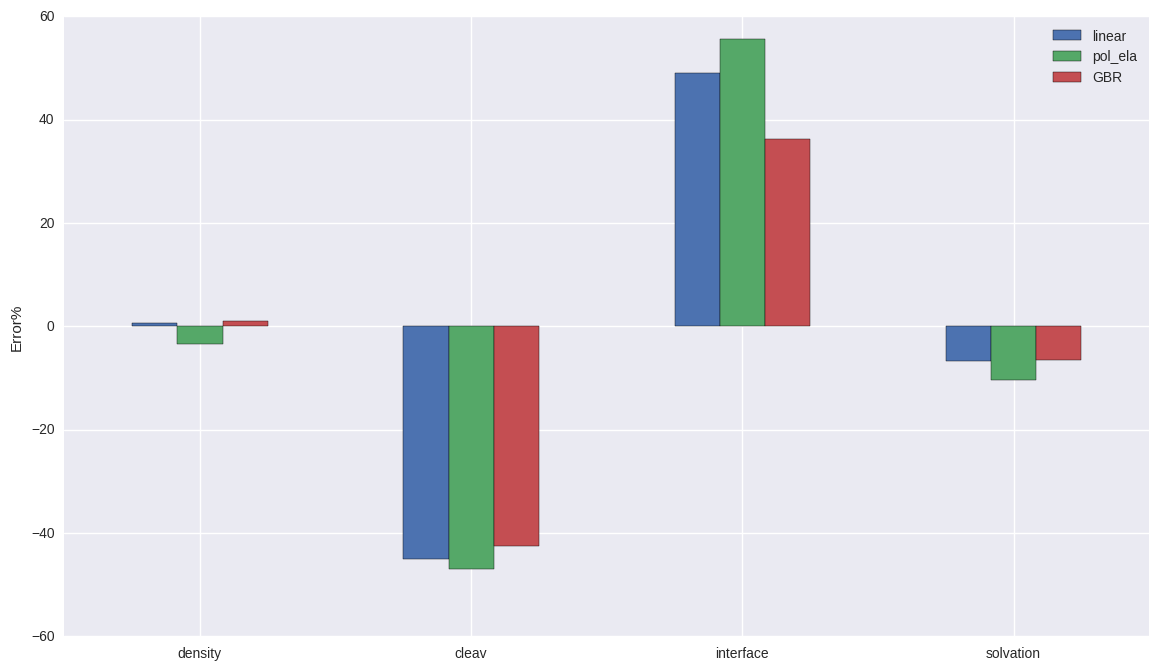

In [33]:
result = {'linear' : np.array([3.14, 1535, -53.58, -734]), 
          'pol_ela' : np.array([3.27, 1556, -46.57, -760]),
          'GBR' : np.array([3.13, 1507, -66.86, -733])}

exp = {'exp' : np.array([3.160, 1058, -105, -688])}
      
exp_pd = pd.DataFrame(exp)
result_pd = pd.DataFrame(result)

accuracy = pd.DataFrame((exp_pd.values - result_pd.values) * 100 / (exp_pd.values), columns=result_pd.columns)

accuracy = accuracy[['linear', 'pol_ela', 'GBR']]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,8))
accuracy.plot.bar(ax = ax)
ax.set_ylabel("Error%")
label = ['density', 'cleav', 'interface', 'solvation']
ax.set_xticklabels(label, rotation=0)

## Improvement
The prediction results might be improved by applying a few improvements:

1- The performance of the best prediction model GBR strongly depends on the number of training data and using more data for training improves the performance of the model.

2- The available data contains four target variables and four regressor variables, however, we found that one target variable is independence to the features, leading to reduce the performance of the prediction models. Adding new features might improve the prediction models.

3- Due to the complexity of the problem, using other model based on the decision tree such as xgboost might lead to better result. 